In [102]:
import numpy as np 
import pandas as pd 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('C:/Users/ameri/OneDrive/Documents/MCD/Tetramestre 4/Preprocesamiento de datos/Tarea 1/dataset.csv')
df = df[df['rotten_tomatoes_link'] == 'm/spider_man_homecoming']
df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/spider_man_homecoming,Rob Hunter,False,Film School Rejects,Fresh,NaN,6/29/2017,The new Spider-Man's solo Marvel debut is a ne...
1,m/spider_man_homecoming,Nick De Semlyen,False,Empire Magazine,Fresh,5-Apr,6/29/2017,"The characters and scenarios are familiar, but..."
2,m/spider_man_homecoming,Stefan Pape,False,HeyUGuys,Fresh,5-Apr,6/29/2017,Spidey is finally able to bounce off other fam...
3,m/spider_man_homecoming,Jonathan L. Fischer,True,Slate,Fresh,NaN,6/29/2017,Spider-Man: Homecoming is both a homecoming fo...
4,m/spider_man_homecoming,Alan Scherstuhl,True,Village Voice,Fresh,NaN,6/29/2017,The first Spidey flick as ebullient as the com...
...,...,...,...,...,...,...,...,...
385,m/spider_man_homecoming,Brent McKnight,False,The Last Thing I See,Fresh,A-,7/1/2020,A good time that revisits a fan favorite chara...
386,m/spider_man_homecoming,CJ Sheu,False,Review Film Review,Rotten,NaN,7/1/2020,"Maybe I'm just getting old here, but I could b..."
387,m/spider_man_homecoming,Ricardo Gallegos,False,Pólvora,Fresh,NaN,7/3/2020,A wonderful coming-of-age tale about a kid try...
388,m/spider_man_homecoming,Damond Fudge,False,"KCCI (Des Moines, IA)",Fresh,NaN,7/14/2020,The first Marvel Cinematic Universe film in a ...


In [103]:
import re
newdf = pd.DataFrame({'review_content': [', '.join(df['review_content'].str.strip('"').tolist())]})
description =  re.sub('[^a-zA-Z]',' ',newdf['review_content'][0])
description

'The new Spider Man s solo Marvel debut is a near perfect mash up of superhero movie and teen comedy   The characters and scenarios are familiar  but this is a loose  cool  funny remix that makes them feel fresh again  Plus  it s mercifully short on life lessons from Aunt May   Spidey is finally able to bounce off other familiar faces  and the results are nothing short of a triumph   Spider Man  Homecoming is both a homecoming for the character as well as a movie in which Spider Man literally goes to homecoming a fitting re introduction and an endearingly goofy teen flick   The first Spidey flick as ebullient as the comics you read when you were a kid   Spider Man  Homecoming is a funny  heartfelt  coming of age story that defly captures the awkwardness of being a teenager   Peter Parker aka Spider Man aka the wise crackin   science tinkerin   shy around girls neighborhood crime fighter is back  Not just back home   Sony  who had something to gain from allowing Spider Man to be part of

In [104]:
description = description.lower()
description

'the new spider man s solo marvel debut is a near perfect mash up of superhero movie and teen comedy   the characters and scenarios are familiar  but this is a loose  cool  funny remix that makes them feel fresh again  plus  it s mercifully short on life lessons from aunt may   spidey is finally able to bounce off other familiar faces  and the results are nothing short of a triumph   spider man  homecoming is both a homecoming for the character as well as a movie in which spider man literally goes to homecoming a fitting re introduction and an endearingly goofy teen flick   the first spidey flick as ebullient as the comics you read when you were a kid   spider man  homecoming is a funny  heartfelt  coming of age story that defly captures the awkwardness of being a teenager   peter parker aka spider man aka the wise crackin   science tinkerin   shy around girls neighborhood crime fighter is back  not just back home   sony  who had something to gain from allowing spider man to be part of

In [105]:
import nltk
nltk.download('stopwords')
description_words = description.split() 
description_words = [word for word in description_words if not word in stopwords.words('english')]
description_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['new',
 'spider',
 'man',
 'solo',
 'marvel',
 'debut',
 'near',
 'perfect',
 'mash',
 'superhero',
 'movie',
 'teen',
 'comedy',
 'characters',
 'scenarios',
 'familiar',
 'loose',
 'cool',
 'funny',
 'remix',
 'makes',
 'feel',
 'fresh',
 'plus',
 'mercifully',
 'short',
 'life',
 'lessons',
 'aunt',
 'may',
 'spidey',
 'finally',
 'able',
 'bounce',
 'familiar',
 'faces',
 'results',
 'nothing',
 'short',
 'triumph',
 'spider',
 'man',
 'homecoming',
 'homecoming',
 'character',
 'well',
 'movie',
 'spider',
 'man',
 'literally',
 'goes',
 'homecoming',
 'fitting',
 'introduction',
 'endearingly',
 'goofy',
 'teen',
 'flick',
 'first',
 'spidey',
 'flick',
 'ebullient',
 'comics',
 'read',
 'kid',
 'spider',
 'man',
 'homecoming',
 'funny',
 'heartfelt',
 'coming',
 'age',
 'story',
 'defly',
 'captures',
 'awkwardness',
 'teenager',
 'peter',
 'parker',
 'aka',
 'spider',
 'man',
 'aka',
 'wise',
 'crackin',
 'science',
 'tinkerin',
 'shy',
 'around',
 'girls',
 'neighborhood',
 '

In [106]:
ps = PorterStemmer()
description_words_stem=[ps.stem(word) for word in description_words]
description_words_stem

['new',
 'spider',
 'man',
 'solo',
 'marvel',
 'debut',
 'near',
 'perfect',
 'mash',
 'superhero',
 'movi',
 'teen',
 'comedi',
 'charact',
 'scenario',
 'familiar',
 'loos',
 'cool',
 'funni',
 'remix',
 'make',
 'feel',
 'fresh',
 'plu',
 'merci',
 'short',
 'life',
 'lesson',
 'aunt',
 'may',
 'spidey',
 'final',
 'abl',
 'bounc',
 'familiar',
 'face',
 'result',
 'noth',
 'short',
 'triumph',
 'spider',
 'man',
 'homecom',
 'homecom',
 'charact',
 'well',
 'movi',
 'spider',
 'man',
 'liter',
 'goe',
 'homecom',
 'fit',
 'introduct',
 'endearingli',
 'goofi',
 'teen',
 'flick',
 'first',
 'spidey',
 'flick',
 'ebulli',
 'comic',
 'read',
 'kid',
 'spider',
 'man',
 'homecom',
 'funni',
 'heartfelt',
 'come',
 'age',
 'stori',
 'defli',
 'captur',
 'awkward',
 'teenag',
 'peter',
 'parker',
 'aka',
 'spider',
 'man',
 'aka',
 'wise',
 'crackin',
 'scienc',
 'tinkerin',
 'shi',
 'around',
 'girl',
 'neighborhood',
 'crime',
 'fighter',
 'back',
 'back',
 'home',
 'soni',
 'someth',

In [107]:
newdf['review_content'][0]=' '.join(description_words_stem)
newdf['review_content'][0]

'new spider man solo marvel debut near perfect mash superhero movi teen comedi charact scenario familiar loos cool funni remix make feel fresh plu merci short life lesson aunt may spidey final abl bounc familiar face result noth short triumph spider man homecom homecom charact well movi spider man liter goe homecom fit introduct endearingli goofi teen flick first spidey flick ebulli comic read kid spider man homecom funni heartfelt come age stori defli captur awkward teenag peter parker aka spider man aka wise crackin scienc tinkerin shi around girl neighborhood crime fighter back back home soni someth gain allow spider man part mcu univers allow marvel make superstar support player particularli nice movi mani bad guy overli complic plot bunch ridicul fight scene needlessli complex tell happen spri lovabl spider man movi spri lovabl spider man everi time peter choos whether self appoint job seiz one irreplac person moment liz strain show face civil war made conflict big funni thrill ho

In [108]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
cachedStopWords = set(stopwords.words("english"))
cachedStopWords.update(('Amazing', 'amazing', 'AMAZING'))
words_ns = [word for word in description_words if word not in cachedStopWords]
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]
print(words_lem[:10])

['new', 'spider', 'man', 'solo', 'marvel', 'debut', 'near', 'perfect', 'mash', 'superhero']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


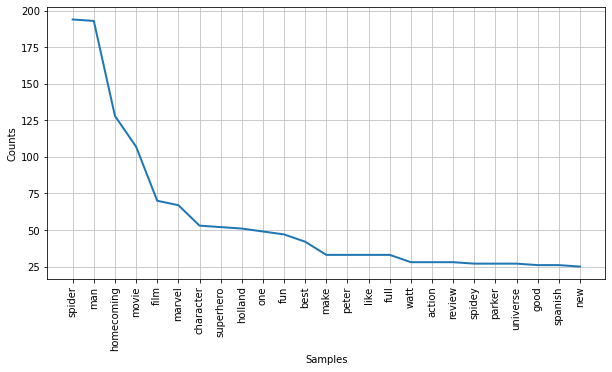

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [109]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_lem)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

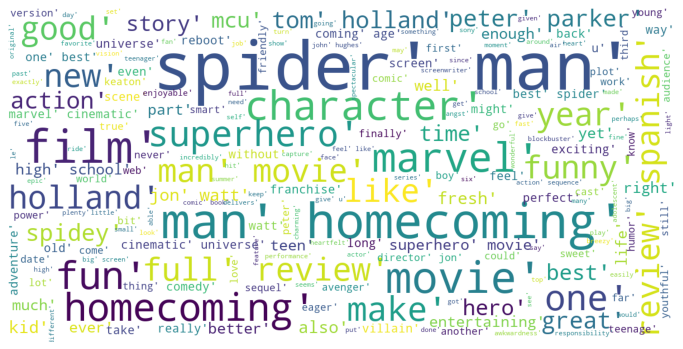

In [110]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_lem)

In [111]:
df = pd.read_csv('C:/Users/ameri/OneDrive/Documents/MCD/Tetramestre 4/Preprocesamiento de datos/Tarea 1/dataset.csv')
df = df[df['rotten_tomatoes_link'] == 'm/the_amazing_spider_man']
df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
634,m/the_amazing_spider_man,Kate Muir,True,Times (UK),Fresh,5-Apr,6/19/2012,Yet another generation will bear the Spiderman...
635,m/the_amazing_spider_man,Nick Curtis,True,London Evening Standard,Rotten,5-Feb,6/19/2012,"Shame. We finally get a British superhero, and..."
636,m/the_amazing_spider_man,Kevin Harley,False,Total Film,Fresh,5-Apr,6/19/2012,"The leads charm, the action crackles and the g..."
637,m/the_amazing_spider_man,Andrew Pulver,True,Guardian,Fresh,5-Apr,6/19/2012,Webb successfully treads a fine line between k...
638,m/the_amazing_spider_man,Robbie Collin,True,Daily Telegraph (UK),Fresh,5-Apr,6/19/2012,The Avengers fans have enough heroes already. ...
...,...,...,...,...,...,...,...,...
961,m/the_amazing_spider_man,Katie Smith-Wong,False,Musings of Guitargalchina,Fresh,3.5/5,12/10/2019,The Amazing Spider-Man is enjoyable filled wit...
962,m/the_amazing_spider_man,Josh Wilding,False,ComicBookMovie.com,Fresh,5-Mar,2/15/2020,A flawed but still solid Spider-Man movie whic...
963,m/the_amazing_spider_man,Yasser Medina,False,Cinemaficionados,Rotten,10-Jun,6/25/2020,It shows new things in the Spider-Man universe...
964,m/the_amazing_spider_man,Brent McKnight,False,The Last Thing I See,Fresh,B-,7/13/2020,"This is fine, but is fine good enough for one ..."


In [112]:
import re
newdf = pd.DataFrame({'review_content': [', '.join(df['review_content'].str.strip('"').tolist())]})
description =  re.sub('[^a-zA-Z]',' ',newdf['review_content'][0])
description

'Yet another generation will bear the Spiderman emblem on their lunchboxes and pencilcases  and there s no harm in that  With great power comes great responsibility    and an endless franchise   Shame  We finally get a British superhero  and he s a bit boring   The leads charm  the action crackles and the grooves are well laid for part two   Webb successfully treads a fine line between keeping the hardcore superhero movie fans happy and injecting a dose of meaningful affect   The Avengers fans have enough heroes already  What a thrill to see one fighting for another cause   We re never far from romance or laughs  and at times  The Amazing Spider Man  feels like a romcom upgraded to include  D and industrial cobwebs   It s an efficient piece of corporate film making  but nothing more   A mostly slick  entertaining and emotionally involving recombination of fresh and familiar elements   Graced with great performances from Garfield and Stone  The Amazing Spider Man is a rare comic book fl

In [113]:
description = description.lower()
description

'yet another generation will bear the spiderman emblem on their lunchboxes and pencilcases  and there s no harm in that  with great power comes great responsibility    and an endless franchise   shame  we finally get a british superhero  and he s a bit boring   the leads charm  the action crackles and the grooves are well laid for part two   webb successfully treads a fine line between keeping the hardcore superhero movie fans happy and injecting a dose of meaningful affect   the avengers fans have enough heroes already  what a thrill to see one fighting for another cause   we re never far from romance or laughs  and at times  the amazing spider man  feels like a romcom upgraded to include  d and industrial cobwebs   it s an efficient piece of corporate film making  but nothing more   a mostly slick  entertaining and emotionally involving recombination of fresh and familiar elements   graced with great performances from garfield and stone  the amazing spider man is a rare comic book fl

In [114]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
description_words = description.split() 
description_words = [word for word in description_words if not word in stopwords.words('english')]
description_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['yet',
 'another',
 'generation',
 'bear',
 'spiderman',
 'emblem',
 'lunchboxes',
 'pencilcases',
 'harm',
 'great',
 'power',
 'comes',
 'great',
 'responsibility',
 'endless',
 'franchise',
 'shame',
 'finally',
 'get',
 'british',
 'superhero',
 'bit',
 'boring',
 'leads',
 'charm',
 'action',
 'crackles',
 'grooves',
 'well',
 'laid',
 'part',
 'two',
 'webb',
 'successfully',
 'treads',
 'fine',
 'line',
 'keeping',
 'hardcore',
 'superhero',
 'movie',
 'fans',
 'happy',
 'injecting',
 'dose',
 'meaningful',
 'affect',
 'avengers',
 'fans',
 'enough',
 'heroes',
 'already',
 'thrill',
 'see',
 'one',
 'fighting',
 'another',
 'cause',
 'never',
 'far',
 'romance',
 'laughs',
 'times',
 'amazing',
 'spider',
 'man',
 'feels',
 'like',
 'romcom',
 'upgraded',
 'include',
 'industrial',
 'cobwebs',
 'efficient',
 'piece',
 'corporate',
 'film',
 'making',
 'nothing',
 'mostly',
 'slick',
 'entertaining',
 'emotionally',
 'involving',
 'recombination',
 'fresh',
 'familiar',
 'eleme

In [115]:
ps = PorterStemmer()
description_words_stem=[ps.stem(word) for word in description_words]
description_words_stem

['yet',
 'anoth',
 'gener',
 'bear',
 'spiderman',
 'emblem',
 'lunchbox',
 'pencilcas',
 'harm',
 'great',
 'power',
 'come',
 'great',
 'respons',
 'endless',
 'franchis',
 'shame',
 'final',
 'get',
 'british',
 'superhero',
 'bit',
 'bore',
 'lead',
 'charm',
 'action',
 'crackl',
 'groov',
 'well',
 'laid',
 'part',
 'two',
 'webb',
 'success',
 'tread',
 'fine',
 'line',
 'keep',
 'hardcor',
 'superhero',
 'movi',
 'fan',
 'happi',
 'inject',
 'dose',
 'meaning',
 'affect',
 'aveng',
 'fan',
 'enough',
 'hero',
 'alreadi',
 'thrill',
 'see',
 'one',
 'fight',
 'anoth',
 'caus',
 'never',
 'far',
 'romanc',
 'laugh',
 'time',
 'amaz',
 'spider',
 'man',
 'feel',
 'like',
 'romcom',
 'upgrad',
 'includ',
 'industri',
 'cobweb',
 'effici',
 'piec',
 'corpor',
 'film',
 'make',
 'noth',
 'mostli',
 'slick',
 'entertain',
 'emot',
 'involv',
 'recombin',
 'fresh',
 'familiar',
 'element',
 'grace',
 'great',
 'perform',
 'garfield',
 'stone',
 'amaz',
 'spider',
 'man',
 'rare',
 'com

In [116]:
newdf['review_content'][0]=' '.join(description_words_stem)
newdf['review_content'][0]

'yet anoth gener bear spiderman emblem lunchbox pencilcas harm great power come great respons endless franchis shame final get british superhero bit bore lead charm action crackl groov well laid part two webb success tread fine line keep hardcor superhero movi fan happi inject dose meaning affect aveng fan enough hero alreadi thrill see one fight anoth caus never far romanc laugh time amaz spider man feel like romcom upgrad includ industri cobweb effici piec corpor film make noth mostli slick entertain emot involv recombin fresh familiar element grace great perform garfield stone amaz spider man rare comic book flick better examin relationship superhero leap back onto screen new cast crew costum whole new array daddi issu amaz spider man reboot top gross marvel franchis altogeth satisfi result charact fall love bag charm seri safe hand longtim comic book fan spidey enthusiast bla latest big screen incarn may offer obviou immedi satisfact sam raimi movi certainli set solid groundwork an

In [117]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
cachedStopWords = set(stopwords.words("english"))
cachedStopWords.update(('Amazing', 'amazing', 'AMAZING'))
words_ns = [word for word in description_words if word not in cachedStopWords]
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]
print(words_lem[:10])

['yet', 'another', 'generation', 'bear', 'spiderman', 'emblem', 'lunchboxes', 'pencilcases', 'harm', 'great']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


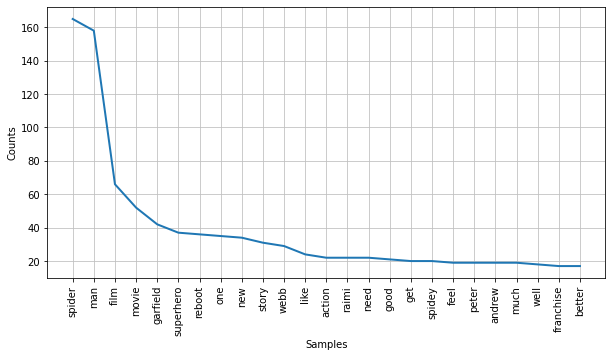

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [118]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_lem)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

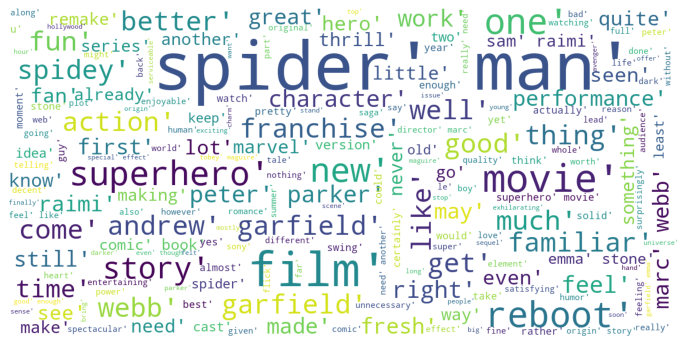

In [119]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_lem)

In [120]:
df = pd.read_csv('C:/Users/ameri/OneDrive/Documents/MCD/Tetramestre 4/Preprocesamiento de datos/Tarea 1/dataset.csv')
df = df[df['rotten_tomatoes_link'] == 'm/spiderman']
df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
390,m/spiderman,David Poland,False,Hot Button,Fresh,NaN,4/9/2002,"Once it gets rolling, it gets past the CG prob..."
391,m/spiderman,Moriarty,False,Ain't It Cool Movie Reviews,Fresh,NaN,4/16/2002,[Sam Raimi] has crafted a film here that is co...
392,m/spiderman,Michael Szymanski,False,Zap2it.com,Fresh,4-Apr,4/16/2002,A perfect summer popcorn movie with lots of gr...
393,m/spiderman,Scott A. Mantz,False,Scott Mantz' Movie Reviews,Fresh,5-Mar,4/19/2002,About as good as can be expected for an introd...
394,m/spiderman,Kirk Honeycutt,True,Hollywood Reporter,Fresh,NaN,4/22/2002,Guileless and charming with a perpetual look o...
...,...,...,...,...,...,...,...,...
629,m/spiderman,Jonathan Lethem,False,London Review of Books,Fresh,NaN,11/6/2018,Tobey Maguire brings to the film a tenderness ...
630,m/spiderman,Zaki Hasan,False,Zaki's Corner,Fresh,NaN,3/22/2019,"Watching Spider-Man today, it's easy to see wh..."
631,m/spiderman,PJ Nabarro,False,Patrick Nabarro,Fresh,5-Apr,8/13/2019,"It's all lightly done, and Raimi never forgets..."
632,m/spiderman,Debbie Lynn Elias,False,Behind The Lens,Fresh,NaN,11/15/2019,"A true masterpiece, er, make that, web-masterp..."


In [121]:
import re
newdf = pd.DataFrame({'review_content': [', '.join(df['review_content'].str.strip('"').tolist())]})
description =  re.sub('[^a-zA-Z]',' ',newdf['review_content'][0])
description

'Once it gets rolling  it gets past the CG problems that plague the early swinging sequences and there are a couple of truly first rate action sequences    Sam Raimi  has crafted a film here that is completely honest to its comic book roots while also fully embracing the unique kicks that cinema can offer   A perfect summer popcorn movie with lots of great effects  enough action  plenty of laughs  lots of romance and a great deal of heart   About as good as can be expected for an introductory superhero movie  but it would have been nice if it was better than expected   Guileless and charming with a perpetual look of startled bewilderment at the super powers he possesses  Maguire is perfect as an ordinary guy with a big secret   This long awaited future franchise is a competent seat warmer at the box office table for the two weekends preceding George Lucas s Attack of the Clones   Raimi does right by Stan Lee and Steve Ditko s original creation via an old fashioned comic book aesthetic 

In [122]:
description = description.lower()
description

'once it gets rolling  it gets past the cg problems that plague the early swinging sequences and there are a couple of truly first rate action sequences    sam raimi  has crafted a film here that is completely honest to its comic book roots while also fully embracing the unique kicks that cinema can offer   a perfect summer popcorn movie with lots of great effects  enough action  plenty of laughs  lots of romance and a great deal of heart   about as good as can be expected for an introductory superhero movie  but it would have been nice if it was better than expected   guileless and charming with a perpetual look of startled bewilderment at the super powers he possesses  maguire is perfect as an ordinary guy with a big secret   this long awaited future franchise is a competent seat warmer at the box office table for the two weekends preceding george lucas s attack of the clones   raimi does right by stan lee and steve ditko s original creation via an old fashioned comic book aesthetic 

In [123]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
description_words = description.split() 
description_words = [word for word in description_words if not word in stopwords.words('english')]
description_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['gets',
 'rolling',
 'gets',
 'past',
 'cg',
 'problems',
 'plague',
 'early',
 'swinging',
 'sequences',
 'couple',
 'truly',
 'first',
 'rate',
 'action',
 'sequences',
 'sam',
 'raimi',
 'crafted',
 'film',
 'completely',
 'honest',
 'comic',
 'book',
 'roots',
 'also',
 'fully',
 'embracing',
 'unique',
 'kicks',
 'cinema',
 'offer',
 'perfect',
 'summer',
 'popcorn',
 'movie',
 'lots',
 'great',
 'effects',
 'enough',
 'action',
 'plenty',
 'laughs',
 'lots',
 'romance',
 'great',
 'deal',
 'heart',
 'good',
 'expected',
 'introductory',
 'superhero',
 'movie',
 'would',
 'nice',
 'better',
 'expected',
 'guileless',
 'charming',
 'perpetual',
 'look',
 'startled',
 'bewilderment',
 'super',
 'powers',
 'possesses',
 'maguire',
 'perfect',
 'ordinary',
 'guy',
 'big',
 'secret',
 'long',
 'awaited',
 'future',
 'franchise',
 'competent',
 'seat',
 'warmer',
 'box',
 'office',
 'table',
 'two',
 'weekends',
 'preceding',
 'george',
 'lucas',
 'attack',
 'clones',
 'raimi',
 'right

In [124]:
ps = PorterStemmer()
description_words_stem=[ps.stem(word) for word in description_words]
description_words_stem

['get',
 'roll',
 'get',
 'past',
 'cg',
 'problem',
 'plagu',
 'earli',
 'swing',
 'sequenc',
 'coupl',
 'truli',
 'first',
 'rate',
 'action',
 'sequenc',
 'sam',
 'raimi',
 'craft',
 'film',
 'complet',
 'honest',
 'comic',
 'book',
 'root',
 'also',
 'fulli',
 'embrac',
 'uniqu',
 'kick',
 'cinema',
 'offer',
 'perfect',
 'summer',
 'popcorn',
 'movi',
 'lot',
 'great',
 'effect',
 'enough',
 'action',
 'plenti',
 'laugh',
 'lot',
 'romanc',
 'great',
 'deal',
 'heart',
 'good',
 'expect',
 'introductori',
 'superhero',
 'movi',
 'would',
 'nice',
 'better',
 'expect',
 'guileless',
 'charm',
 'perpetu',
 'look',
 'startl',
 'bewilder',
 'super',
 'power',
 'possess',
 'maguir',
 'perfect',
 'ordinari',
 'guy',
 'big',
 'secret',
 'long',
 'await',
 'futur',
 'franchis',
 'compet',
 'seat',
 'warmer',
 'box',
 'offic',
 'tabl',
 'two',
 'weekend',
 'preced',
 'georg',
 'luca',
 'attack',
 'clone',
 'raimi',
 'right',
 'stan',
 'lee',
 'steve',
 'ditko',
 'origin',
 'creation',
 'vi

In [125]:
df['review_content'][390]=' '.join(description_words_stem)
df['review_content'][390]

'get roll get past cg problem plagu earli swing sequenc coupl truli first rate action sequenc sam raimi craft film complet honest comic book root also fulli embrac uniqu kick cinema offer perfect summer popcorn movi lot great effect enough action plenti laugh lot romanc great deal heart good expect introductori superhero movi would nice better expect guileless charm perpetu look startl bewilder super power possess maguir perfect ordinari guy big secret long await futur franchis compet seat warmer box offic tabl two weekend preced georg luca attack clone raimi right stan lee steve ditko origin creation via old fashion comic book aesthet watch tobey maguir turn big appl crimin arachnophob strong first act absolut inescap gorgeou skyscrap trapez motion amaz spider man wonder moviego experi peopl love comic idea excelsior mean look around good time movi grab friend grab popcorn see movi spider man grow strang hair get matur bodi find necessari hide new secret parent unit spidey sens say ra

In [126]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
cachedStopWords = set(stopwords.words("english"))
cachedStopWords.update(('Amazing', 'amazing', 'AMAZING'))
words_ns = [word for word in description_words if word not in cachedStopWords]
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]
print(words_lem[:10])

['get', 'rolling', 'get', 'past', 'cg', 'problem', 'plague', 'early', 'swinging', 'sequence']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


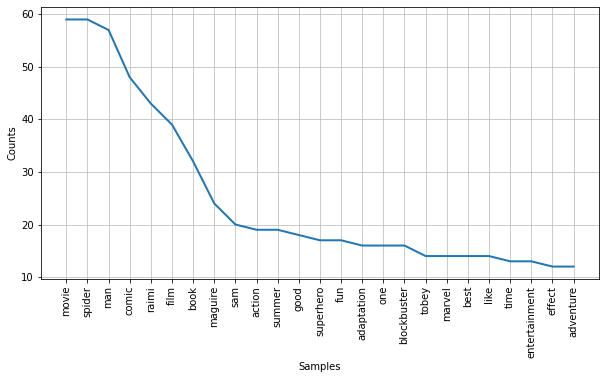

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [127]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_lem)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

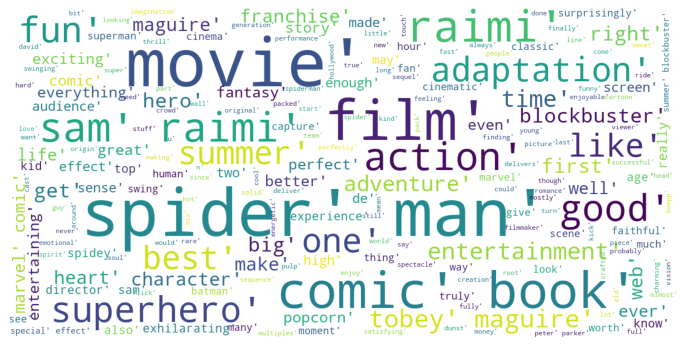

In [128]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_lem)